# Lab 13 Predator-Prey Difference Equations and Eigenvectors.

In the forests of N. California, Dusky-footed Wood Rats provide 80\% of the diet for the Northern Spotted Owl. First, try a simple linear model of the dynamical system that makes up the owls and the rats.

The populations at timestep  $𝑘$ are given by  $x_k = [Owls_k, Rats_k]$, where $Rats_k$ are in  $1000′𝑠$ of rats.

In the absence of predation (by owls) the rat pop grows by 10% per month (this is the timestep for the model). With no rats for food, the owl population falls to one-half the pop in the prev month. The predation rate of rats is $p$
  (take p = 0.104 to start the experime). 
  
Since we have a linear model, there are no Owl-Rat interactions (encounters) in the model, we simulate that by an 
"efficiency* by which the Owls turn Rats into Owls with a conversion efficiency of 0.4 (i.e. when there are abundant Rats, the Owl pop rises by $0.4∗𝑅𝑎𝑡𝑠$.

\begin{align}
  Owls_{n+1} &= 0.5\cdot Owls_n + 0.4\cdot Rats_n\\
  Rats_{n+1} &= -p\cdot Owls_n + 1.1\cdot Rats_n\\
\end{align}

Solve this as a matrix equation by generating $𝑥_1,𝑥_2, \ldots 𝑥_𝑘$ as usual. Remember, each $x_i = [Owls_i, Rats_i]$.
Use $k = 50$. Store the Owl numbers, in each step $i$, in an array $Owl[i]$ and the Rat numbers (in 1000's) in another array $Rats[i]$. 

Using the arrays $Owl[i]$, $Rats[i]$, make (i) a plot of the Owl Pop. v/s Time and the Rat Pop. v/s Time on the same axes. Now, since this is a *difference* equation, the time step (of a month) is implicit in the model. The time axis is generated using the *numpy* function *linspace* with $k$ intervals (make *endpoint=True*). {\bf On the same plot}  (ii) Plot $Owl[i]$ v/s $Rat[i]$. 

Experiment with $[Owl_0, Rats_0] = [20, 40], \ [35, 40] \ [45, 40] \ [60, 40] \ [80, 40]$
(Test with only a single population split first. Go on the to second part of the lab. Finish the rest of the 
populations later). Experiment with changing the predation rate $p$.


*To plot numpy arrays $X, Y$ on the same time $t$ axes:  *plt.plot(t, X, 'r-', t, Y, 'b--')*

*To make 2 plots side-by-side; use the *matplotlib.pyplot* function *subplot(1,2,1)* before the first plot command
and *subplot(1,2,2)* before the second plot command)



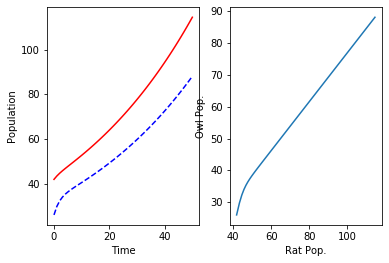

In [37]:
import numpy as np
import matplotlib.pyplot as plt

k = 50
x0 = [20, 40]
owls = np.zeros(k)
rats = np.zeros(k)
mat = np.array([[0.5, 0.4], [-0.104, 1.1]])
x = x0
for i in range(k):
    x = mat@x
    owls[i] = x[0]
    rats[i] = x[1]
    
time = np.linspace(0, k, k, endpoint=True)
ax1 = plt.subplot(1,2,1)
ax1.plot(time, rats, 'r-', time, owls, 'b--')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')

ax2 = plt.subplot(1,2,2)
ax2.plot(rats, owls)
ax2.set_xlabel('Rat Pop.')
ax2.set_ylabel('Owl Pop.')

plt.show()

## The equivalent solution with eigenvalues and eigenvectors of the coefficient matrix.

Next solve the system using the eigenvectors and eigenvalues of the coefficient matrix of the system.

The *numpy.linalg.eig* function returns a tuple consisting of a vector and an array (matrix). The vector (eVal) contains the eigenvalues. The array (matrix) (eVec) contains the corresponding eigenvectors one eigenvector per column (in the same order as the eigenvalues). The eigenvectors are normalized so their Euclidean norms 
(*i.e.* lengths $=\sqrt{x_x^2 +x_y^2}$ ) are 1 ($x_x, \ x_y$ are the components of the eigenvector).

The eigenvalue $eVal[0] = p_1$ goes with the 0th column of eVec. The eigenvalue $eVal[1]= p_2$ goes with column 1, *etc.* To extract the $i^{th}$ column vector: use $v_i = eVec[:,i]$ (assume e-Vectors are $v_1, v_2, $ *etc*). In this case, 
the eigenvectors form a basis set (any vector in the space can be expressed as a linear combination of the eigenvectors (for example $x_0$ below).

Express the initial state $x_0 = c_1 v_1 + c_2 v_2$ 

To determine $c_1$ and $c_2$:

Take the dot (inner) product of $x_0$ with $v_1$: $(v_1\cdot x_0) = c_1 (1) + c_2 (v_1\cdot v_2)$ --(Eq.1)

Take the dot (inner) product of $x_0$ with $v_2$: $(v_2\cdot x_0) = c_1 (v_1\cdot v_2) + c_2 (1)$ --(Eq.2)

Since we know $x_0, v_1, v_2$; Use the *numpy.linalg* *solve* function on (1) \& (2) above to find $c_1$ and $c_2$.
$b = [(v_1\cdot x_0), (v_2\cdot x_0)]$

The solution for any step $n$ can then be expressed as:
$x_n = c_1(p_1)^n v_1 + c_2 (p_2)^n v_2$. --(Eq.3)

Remember $x_0$ is the initial vector with Initial number of Owls and Rats.

Make a matrix of $shape= (N, 2)$. Store the initial population vector $x_0$ in the $0^{th}$ column by:
$x_0 = x_e0[0, :]$. Next loop over the number of timesteps ($N$) and store each new $x_j$ as the $j^{th}$ column
of your $N\times 2$ array. 

Make the {\bf same} plots as the first part. Check that the plots you get are identical.

Consider that one of the eigenvalues is larger than the other. Divide the RHS of (3) by the larger eigenvalue:

$x_n = p_2^n \left ( c_1 \left ( \frac{p_1}{p_2} \right )^n v_1 + c_2 v_2 \right )$.

As $n \rightarrow \infty$, the first term goes to 0 \&: $x_n \rightarrow c_2 p_2^nv_2$

More importantly: $x_{n+1} = (p_2)x_k = (p_2)^{n+1} x_0$. Meaning that in the long term, the populations simply 
get scaled by the largest eigenvalue. This is what you should be able to observe in your plots.



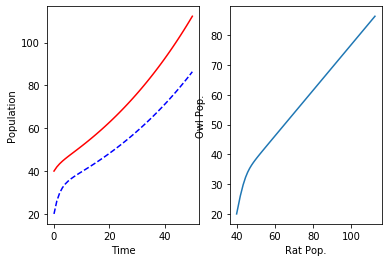

In [43]:
eVal, eVec = np.linalg.eig(mat)
a = np.array([[1, np.dot(eVec[:,0], eVec[:,1])], [np.dot(eVec[:,0], eVec[:,1]), 1]])
b = np.array([np.dot(eVec[:,0], x0), np.dot(eVec[:,1], x0)])
c1, c2 = np.linalg.solve(a, b)

popMatrix = np.zeros((k, 2))
popMatrix[0,:] = x0
for i in range(1, k):
    popMatrix[i,:] = c1*(eVal[0]**i)*eVec[:,0] + c2*(eVal[1]**i)*eVec[:,1]
    
#Plotting
ax1 = plt.subplot(1,2,1)
ax1.plot(time, popMatrix[:,1], 'r-', time, popMatrix[:,0], 'b--')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')

ax2 = plt.subplot(1,2,2)
ax2.plot(popMatrix[:,1], popMatrix[:,0])
ax2.set_xlabel('Rat Pop.')
ax2.set_ylabel('Owl Pop.')

plt.show()